In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import contextily as ctx
import geopandas

In [3]:
df = pd.read_csv('../data/raw/kc_house_data.csv')

In [4]:
waterfront_df = df[df['waterfront'] == 1]
great_view_df = df[df['view'] == 4]

In [5]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat), crs="EPSG:4326")

In [6]:
water_gdf = geopandas.GeoDataFrame(
    waterfront_df, geometry=geopandas.points_from_xy(waterfront_df.long, waterfront_df.lat), crs="EPSG:4326")

In [7]:
great_view_gdf = geopandas.GeoDataFrame(
    great_view_df, geometry=geopandas.points_from_xy(great_view_df.long, great_view_df.lat), crs="EPSG:4326")

In [8]:
water_gdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513,POINT (-122.45100 47.40410)
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193,POINT (-122.37500 47.44970)
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841,POINT (-122.07200 47.63380)
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267,POINT (-122.43800 47.46830)
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508,POINT (-122.07700 47.60530)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,3/17/2015,1900000.0,3,2.50,2830,4334,3.0,1.0,4.0,...,2830,0.0,2006,0.0,98074,47.6318,-122.071,2830,38211,POINT (-122.07100 47.63180)
20309,518500480,8/11/2014,3000000.0,3,3.50,4410,10756,2.0,1.0,4.0,...,3430,980.0,2014,0.0,98056,47.5283,-122.205,3550,5634,POINT (-122.20500 47.52830)
20751,8043700105,4/17/2015,2300000.0,4,4.00,4360,8175,2.5,1.0,4.0,...,3940,420.0,2007,0.0,98008,47.5724,-122.104,2670,8525,POINT (-122.10400 47.57240)
21185,518500460,10/8/2014,2230000.0,3,3.50,3760,5634,2.0,1.0,4.0,...,2830,930.0,2014,0.0,98056,47.5285,-122.205,3560,5762,POINT (-122.20500 47.52850)


In [9]:
gdf = gdf.to_crs(epsg=3857)
water_gdf = water_gdf.to_crs(epsg=3857)
great_view_gdf = great_view_gdf.to_crs(epsg=3857)

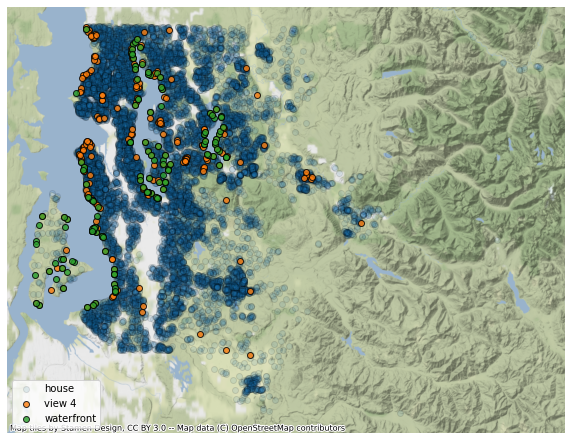

In [10]:
all_homes = gdf.plot(figsize=(10, 10), alpha=0.1, edgecolor='k', label='house')
great_view_ax = great_view_gdf.plot(ax=all_homes, alpha=0.8, edgecolor='k', label='view 4')
water_gdf_ax = water_gdf.plot(ax=great_view_ax, alpha=0.8, edgecolor='k', label='waterfront')
plt.legend()
ctx.add_basemap(water_gdf_ax, source=ctx.providers.Stamen.TerrainBackground)
water_gdf_ax.set_axis_off()


### Schools:

In [24]:
schools_df = pd.read_csv('../data/raw/school_ratings.csv', index_col=0)

In [25]:
schools_df = schools_df[schools_df['state'] == ' WA']

In [26]:
schools_df = schools_df.drop([48, 51], axis=0)

In [27]:
schools_gdf = geopandas.GeoDataFrame(
    schools_df, geometry=geopandas.points_from_xy(schools_df.long, schools_df.lat), crs="EPSG:4326")

In [40]:
expensive_homes_df = df[df['price'] > df['price'].quantile(.8)]

In [41]:
schools_gdf.sort_values('lat', ascending=False)

,name,rating,street,city,zip,lat,long,state,geometry
49,Bothell High School,9,9130 Northeast 180th Street,Bothell,98011,47.759935,-122.218726,WA,POINT (-13605326.333 6067009.093)
78,Laura Ingalls Wilder Elementary School,9,22130 Northeast 133rd Street,Woodinville,98077,47.759417,-122.040193,WA,POINT (-13585452.141 6066923.315)
8,Inglemoor High School,9,15500 Simonds Road Northeast,Kenmore,98028,47.740510,-122.222158,WA,POINT (-13605708.414 6063792.989)
26,Cedarcrest High School,9,29000 Northeast 150th Street,Duvall,98019,47.735098,-121.956366,WA,POINT (-13576120.562 6062897.185)
38,Henry David Thoreau Elementary School,9,8224 Northeast 138th Street,Kirkland,98034,47.725062,-122.230157,WA,POINT (-13606598.815 6061236.225)
40,Discovery Community School,9,12801 84th Avenue Northeast,Kirkland,98034,47.716794,-122.230759,WA,POINT (-13606665.840 6059868.142)
30,Norman Rockwell Elementary School,9,11125 162nd Avenue Northeast,Redmond,98052,47.699241,-122.123425,WA,POINT (-13594717.485 6056964.229)
33,Rosa Parks Elementary School,9,22845 Ne Cedar Park Crescent,Redmond,98053,47.694161,-122.045105,WA,POINT (-13585998.942 6056124.108)
29,Redmond High School,9,17272 Northeast 104th Street,Redmond,98052,47.692971,-122.109864,WA,POINT (-13593207.848 6055927.301)
37,Kirkland Junior High School,9,430 18th Avenue,Kirkland,98033,47.690116,-122.200412,WA,POINT (-13603287.594 6055455.097)


In [42]:
expensive_homes_gdf = geopandas.GeoDataFrame(
    expensive_homes_df, geometry=geopandas.points_from_xy(expensive_homes_df.long, expensive_homes_df.lat), crs="EPSG:4326")

In [43]:
schools_gdf = schools_gdf.to_crs(epsg=3857)

In [44]:
expensive_homes_gdf = expensive_homes_gdf.to_crs(epsg=3857)

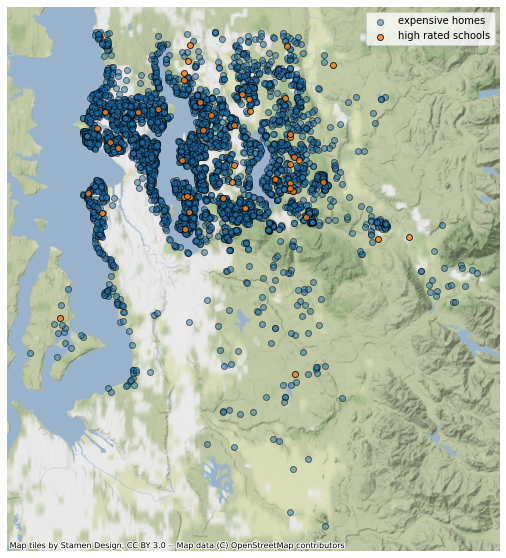

In [45]:
expensive_homes = expensive_homes_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', label='expensive homes')
schools = schools_gdf.plot(ax=expensive_homes, alpha=0.8, edgecolor='k', label='high rated schools')
plt.legend()
ctx.add_basemap(schools, source=ctx.providers.Stamen.TerrainBackground)
schools.set_axis_off()